# 데이터 그룹핑

## groupby 함수

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({
    '학과': ['수학', '화학', '수학', '화학', '수학'],
    '이름': ['로버트', '엔드류', '유진', '제이슨', '제이크'],
    '학년': [1,2,3,2,3],
    '학점': [1.5, 2.7, 3.5, 1.9, 4.0]
})

display(df)

,학과,이름,학년,학점
0,수학,로버트,1,1.5
1,화학,엔드류,2,2.7
2,수학,유진,3,3.5
3,화학,제이슨,2,1.9
4,수학,제이크,3,4.0


In [5]:
df_dept =df.groupby('학과') #데이터 프레임에 대해서 학과를 기준으로 그룹화를 실행

In [7]:
print(df_dept)

In [8]:
# 학과별 기술통계 출력
df_dept.describe()

학년                                                 학점                 \
   count      mean       std  min  25%  50%  75%  max count mean       std   
학과                                                                           
수학   3.0  2.333333  1.154701  1.0  2.0  3.0  3.0  3.0   3.0  3.0  1.322876   
화학   2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   2.0  2.3  0.565685   

                              
    min  25%  50%   75%  max  
학과                            
수학  1.5  2.5  3.5  3.75  4.0  
화학  1.9  2.1  2.3  2.50  2.7

In [9]:
# 학과별 원소 개수 출력
df_dept.count()

,이름,학년,학점
학과,,,
수학,3,3,3
화학,2,2,2


## 1단계 그룹핑

In [10]:
# Series에 대한 1단계 그룹핑
dept = df['학점'].groupby(df['학과'])   # df['컬럼1개']의 경우 series로 반환이 됨
print(dept)

In [11]:
#학과 평균 성적 출력
dept.mean()

학과
수학    3.0
화학    2.3
Name: 학점, dtype: float64

In [12]:
# 학과 성적 표준편차 출력
dept.std()

학과
수학    1.322876
화학    0.565685
Name: 학점, dtype: float64

In [13]:
#group별 크기 출력
group_size= dept.size()
print(group_size)

#각 그룹의 원소개 몇개인가?? 

학과
수학    3
화학    2
Name: 학점, dtype: int64


In [14]:
# 수학과 인원의 데이터만 따로 출력
math= dept.get_group('수학')
print(math) #수학과 학생들 성적만 나옴

0    1.5
2    3.5
4    4.0
Name: 학점, dtype: float64


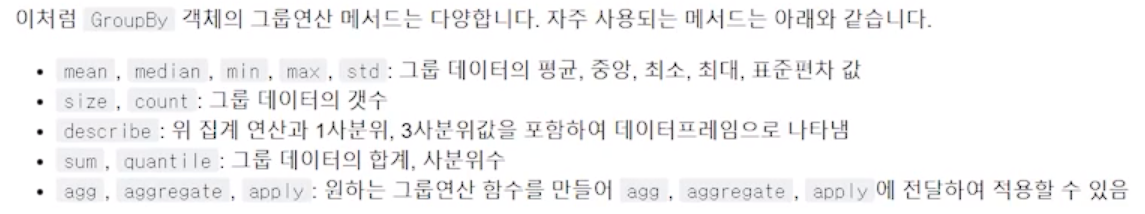

## 2 단계 그룹핑

In [16]:
dept = df.groupby([df['학과'], df['학년']]) # 학과와 학년으로 그룹화 진행
dept

In [17]:
# 그룹별 기술통계 도출
dept.describe()

학점                                              
      count  mean       std  min    25%   50%    75%  max
학과 학년                                                    
수학 1    1.0  1.50       NaN  1.5  1.500  1.50  1.500  1.5
   3    2.0  3.75  0.353553  3.5  3.625  3.75  3.875  4.0
화학 2    2.0  2.30  0.565685  1.9  2.100  2.30  2.500  2.7

In [18]:
display(dept.mean()) #그룹 평균값 도출

C:\Users\jsm91\AppData\Local\Temp\ipykernel_22988\2102249075.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(dept.mean()) #그룹 평균값 도출


학점
학과 학년      
수학 1   1.50
   3   3.75
화학 2   2.30

In [19]:
# 더 많은 데이터로 실습 진행

#새로운 데이터 프레임 생성
df2 = pd.DataFrame({
    '학과':['화학', '수학', '화학', '수학'],
    '이름': ['앤디', '제니', '엘리스', '멜리샤'],
    '학년': [1,2,3,2],
    '학점': [3, 4.2, 3.1,4.5]
})

#df1과 df2 행방향 연결
concat_df = pd.concat([df, df2], axis=0)
concat_df.reset_index(inplace=True, drop=True)
display(concat_df)

,학과,이름,학년,학점
0,수학,로버트,1,1.5
1,화학,엔드류,2,2.7
2,수학,유진,3,3.5
3,화학,제이슨,2,1.9
4,수학,제이크,3,4.0
5,화학,앤디,1,3.0
6,수학,제니,2,4.2
7,화학,엘리스,3,3.1
8,수학,멜리샤,2,4.5


In [20]:
# 학과와 학년별로 그룹핑
dept_and_year = concat_df.groupby([concat_df['학과'], concat_df['학년']])

In [21]:
# 학과 학년별 기술통계
dept_and_year.describe()

학점                                              
      count  mean       std  min    25%   50%    75%  max
학과 학년                                                    
수학 1    1.0  1.50       NaN  1.5  1.500  1.50  1.500  1.5
   2    2.0  4.35  0.212132  4.2  4.275  4.35  4.425  4.5
   3    2.0  3.75  0.353553  3.5  3.625  3.75  3.875  4.0
화학 1    1.0  3.00       NaN  3.0  3.000  3.00  3.000  3.0
   2    2.0  2.30  0.565685  1.9  2.100  2.30  2.500  2.7
   3    1.0  3.10       NaN  3.1  3.100  3.10  3.100  3.1

In [22]:
# 그룹별 평균 출력
dept_and_year.mean()

C:\Users\jsm91\AppData\Local\Temp\ipykernel_22988\1008068002.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dept_and_year.mean()


학점
학과 학년      
수학 1   1.50
   2   4.35
   3   3.75
화학 1   3.00
   2   2.30
   3   3.10

In [24]:
# 2단계 그룹화 인덱스 확인
dept_and_year.mean().index

# 단일인덱스가 아니라 멀티 인덱스임

C:\Users\jsm91\AppData\Local\Temp\ipykernel_22988\3276845810.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dept_and_year.mean().index


MultiIndex([('수학', 1),
            ('수학', 2),
            ('수학', 3),
            ('화학', 1),
            ('화학', 2),
            ('화학', 3)],
           names=['학과', '학년'])

## apply 함수

In [25]:
# 학과별 우수 성적자 3명 출력 함수

def top3_dept_scorer(df):
    return df.sort_values(by='학점', ascending=False)[:3]

In [28]:
# 학과 그룹바이 객체 생성
dept = concat_df.groupby('학과')

In [29]:
# apply와 top3_dept_scorer 함수
dept.apply(top3_dept_scorer)

#수학과 화학과 에서 우수성적자 3명씩 출력되었고 인덱스까지 불러왔다

학과   이름  학년   학점
학과                    
수학 8  수학  멜리샤   2  4.5
   6  수학   제니   2  4.2
   4  수학  제이크   3  4.0
화학 7  화학  엘리스   3  3.1
   5  화학   앤디   1  3.0
   1  화학  엔드류   2  2.7

In [30]:
#학과 최우수 성적 2명을 출력하는 함수
def top2_scorer(series):
    return series.sort_values(ascending=False)[:2]

In [31]:
dept['학점'].apply(top2_scorer)

학과   
수학  8    4.5
    6    4.2
화학  7    3.1
    5    3.0
Name: 학점, dtype: float64

In [32]:
# 멀티인덱스의 경우 데이터 프레임으로 보면 정렬된 뷰를 볼수 있음

pd.DataFrame(dept['학점'].apply(top2_scorer))

학점
학과       
수학 8  4.5
   6  4.2
화학 7  3.1
   5  3.0

## lambda  식 활용

In [33]:
# 새로운 데이터 프레임 생성
df = pd.DataFrame({
    'key': [ 'A','B','B','C','A','C','A','B','C','A'],
    'data': [1, 2, 2, 1, 3, 8, 2, 5, 3, 6]
})

In [34]:
# key별로 그룹화를 진행후 data 값의 크기 별로 오름차순 정렬
df.groupby('key').apply(lambda x: x.sort_values(by='data'))

key  data
key            
A   0   A     1
    6   A     2
    4   A     3
    9   A     6
B   1   B     2
    2   B     2
    7   B     5
C   3   C     1
    8   C     3
    5   C     8

In [35]:
# 위에서 apply 함수를 이용하여 진행한 학과별 성적 탑 3명 학생 출력을 lambda 식으로 진행
dept = concat_df.groupby('학과')

In [36]:
dept.apply(lambda x : x.sort_values(by='학점', ascending=False)[:3])

학과   이름  학년   학점
학과                    
수학 8  수학  멜리샤   2  4.5
   6  수학   제니   2  4.2
   4  수학  제이크   3  4.0
화학 7  화학  엘리스   3  3.1
   5  화학   앤디   1  3.0
   1  화학  엔드류   2  2.7

## groupby 와 재귀함수


In [37]:
# 1차 그룹핑 재귀
for dept, group in concat_df.groupby(concat_df['학과']):
    print('학과: {}'.format(dept))
    display(group)

학과: 수학


,학과,이름,학년,학점
0,수학,로버트,1,1.5
2,수학,유진,3,3.5
4,수학,제이크,3,4.0
6,수학,제니,2,4.2
8,수학,멜리샤,2,4.5


학과: 화학


,학과,이름,학년,학점
1,화학,엔드류,2,2.7
3,화학,제이슨,2,1.9
5,화학,앤디,1,3.0
7,화학,엘리스,3,3.1


In [39]:
# 2차 그룹핑 재귀

for (dept, year), group in concat_df.groupby([concat_df['학과'], concat_df['학년']]): #학과와 학년으로 그룹바이 진행
    print('-' * 25)
    print('학과: ', dept)
    print('학년: ', year)
    display(group)

-------------------------
학과:  수학
학년:  1


,학과,이름,학년,학점
0,수학,로버트,1,1.5


-------------------------
학과:  수학
학년:  2


,학과,이름,학년,학점
6,수학,제니,2,4.2
8,수학,멜리샤,2,4.5


-------------------------
학과:  수학
학년:  3


,학과,이름,학년,학점
2,수학,유진,3,3.5
4,수학,제이크,3,4.0


-------------------------
학과:  화학
학년:  1


,학과,이름,학년,학점
5,화학,앤디,1,3.0


-------------------------
학과:  화학
학년:  2


,학과,이름,학년,학점
1,화학,엔드류,2,2.7
3,화학,제이슨,2,1.9


-------------------------
학과:  화학
학년:  3


,학과,이름,학년,학점
7,화학,엘리스,3,3.1
